In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from utils import arr_transform_dates

In [2]:
df=pd.read_csv('./source/equinox2020.csv')
df

,NGA,Polity,Section,Subsection,Variable,Value.From,Value.To,Date.From,Date.To,Fact.Type,Value.Note,Date.Note
0,Kachi Plain,AfDurrn,General variables,NaN,RA,Stephen Dean,NaN,NaN,NaN,complex,list,NaN
1,Kachi Plain,AfDurrn,General variables,NaN,RA,Alice Williams,NaN,NaN,NaN,complex,list,NaN
2,Kachi Plain,AfDurrn,General variables,NaN,Original name,Durrani Empire,NaN,NaN,NaN,simple,simple,NaN
3,Kachi Plain,AfDurrn,General variables,NaN,Alternative names,Sadozai Kingdom,NaN,NaN,NaN,complex,list,NaN
4,Kachi Plain,AfDurrn,General variables,NaN,Alternative names,Last Afghan Empire,NaN,NaN,NaN,complex,list,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
47472,Yemeni Coastal Plain,YeZiyad,Religion and Normative Ideology,Moralizing Supernatural Powers,Moralizing religion adopted by elites,present,NaN,NaN,NaN,simple,simple,NaN
47473,Yemeni Coastal Plain,YeZiyad,Religion and Normative Ideology,Moralizing Supernatural Powers,Moralizing religion adopted by commoners,present,NaN,NaN,NaN,simple,simple,NaN
47474,Yemeni Coastal Plain,YeZiyad,Religion and Normative Ideology,Moralizing Supernatural Powers,Moralizing enforcement in afterlife,present,NaN,NaN,NaN,simple,simple,NaN
47475,Yemeni Coastal Plain,YeZiyad,Religion and Normative Ideology,Moralizing Supernatural Powers,Moralizing enforcement in this life,present,NaN,NaN,NaN,simple,simple,NaN


In [3]:
df_peaks = df[['NGA', 'Polity', 'Section', 'Subsection', 'Value.From']].loc[df['Variable']=='Peak Date']
df_peaks.fillna(0, inplace=True)
df_peaks = df_peaks[df_peaks['Value.From']!='unknown']
df_peaks.rename({'Value.From': 'Peak Date'}, axis=1, inplace=True)
df_peaks['Peak Date'] = df_peaks['Peak Date'].str.upper()
df_peaks['Peak Date']=arr_transform_dates(df_peaks['Peak Date'].str.replace('8TH CENTURY ', '8').to_list())
df_peaks.sort_values('Peak Date', inplace=True)

<AxesSubplot:xlabel='Peak Date', ylabel='NGA'>

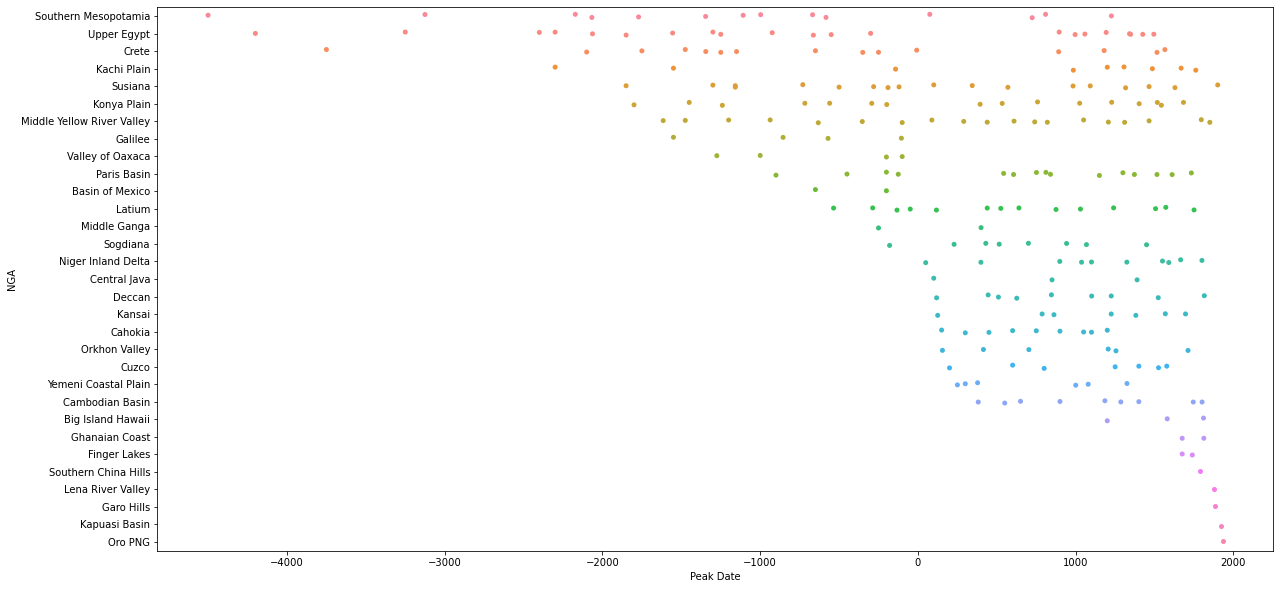

In [4]:
plt.figure(figsize=(20, 10))
sns.stripplot(data=df_peaks, x='Peak Date', y='NGA')

In [5]:
df.to_pickle('./dates_transformed.pkl')